In [ ]:
#importing the necessary libaries

In [197]:
# Install libraries (if necessary)
!pip install keras
!pip install opencv-python-headless  # For cv2
!pip install scikit-learn  # For train_test_split
!pip install Tensorflow
# Import libraries
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split


In [ ]:
#loading the dataset

In [7]:
folder_path = '/Users/abhishekshrivas/Desktop/machine learning AND PATTERN RECOGNITION  /MLPR Images'

In [ ]:
#pre processing 

In [9]:
#fucntion to load images from given folder
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, (256, 256))
            images.append(img)
            labels.append(label)
    return images, labels

In [11]:
import os
import cv2 
#folders and thier corresposnding labes
folders = ['Background', 'Product_1', 'Product_2', 'Product_3', 'Product_4', 'Product_5']
labels = [0, 1, 2, 3, 4, 5]

all_labels = []
all_images = []

#images from each floders
for folder, label in zip(folders, labels):
    current_folder_path = os.path.join(folder_path, folder)
    img, lbls = load_images_from_folder(current_folder_path, label)
    all_images.extend(img)
    all_labels.extend(lbls)

#covert list to numpy array
all_images = np.array(all_images)
all_labels = np.array(all_labels)

In [ ]:
#splitting data 

In [12]:
img_height = 256
img_width = 256
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    folder_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 1938 files belonging to 6 classes.
Using 1551 files for training.


In [15]:
test_ds = tf.keras.utils.image_dataset_from_directory(
    folder_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 1938 files belonging to 6 classes.
Using 387 files for validation.


In [17]:
class_names = train_ds.class_names
print(class_names)

['Background', 'Product_1', 'Product_2', 'Product_3', 'Product_4', 'Product_5']


In [ ]:
#visualising splitted data 

2024-12-12 13:03:07.053371: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


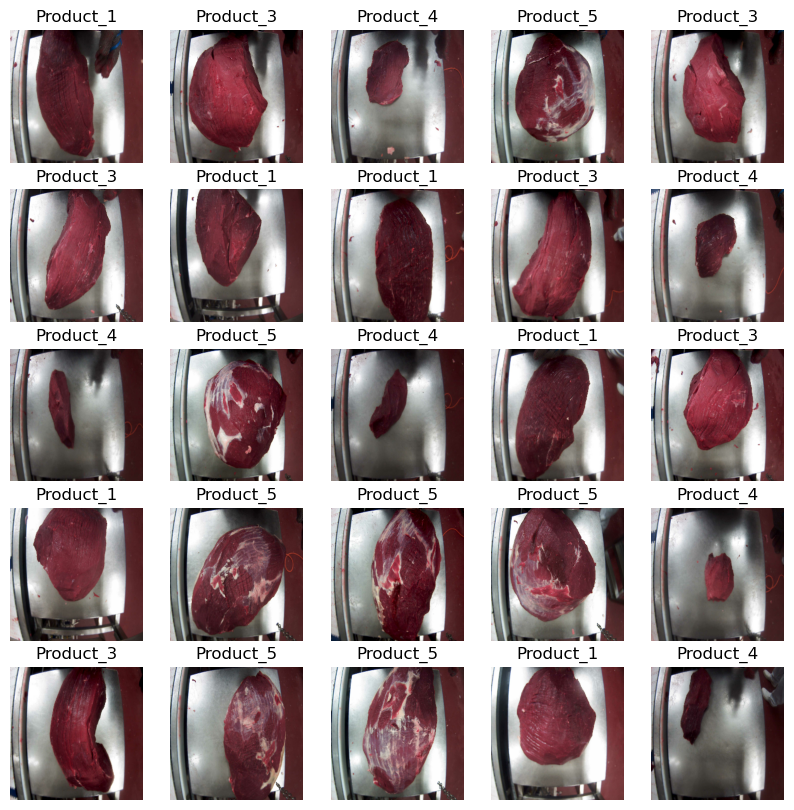

In [19]:
plt.figure(figsize=(10, 10))
for image, label in train_ds.take(1):
    for i in range(25):
        axis = plt.subplot(5, 5, i + 1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_names[label[i]])
        plt.axis("off")

In [ ]:
#AUTO TUNING 

In [21]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
#DATA AUGMENTATION

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


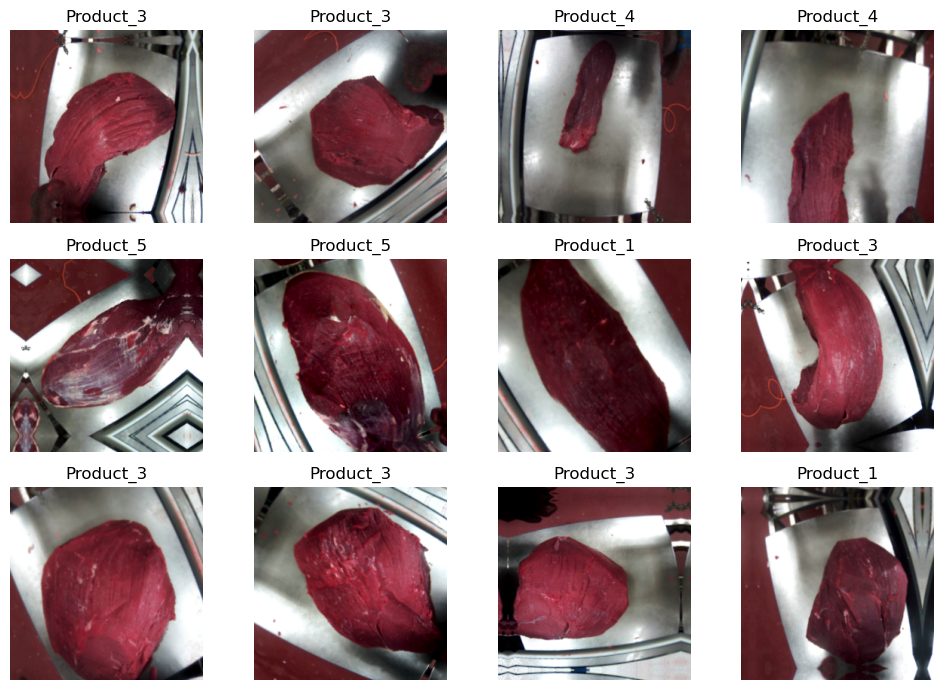

In [195]:
import tensorflow as tf
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomContrast, RandomZoom
import matplotlib.pyplot as plt

# Define image dimensions and augmentation
img_height, img_width = 256, 256
data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal", input_shape=(img_height, img_width, 3)),
    RandomRotation(0.6),
    RandomContrast(0.2),
    RandomZoom(0.2)
])

# Visualization setup
plt.figure(figsize=(10, 7))
n_rows = 3
n_cols = 4
num_images = n_rows * n_cols

# Assuming `train_ds` and `class_names` are defined
for image_batch, label_batch in train_ds.take(1):  # Replace with your dataset
    for i in range(num_images):
        # Apply augmentation to each individual image
        augmented_image = data_augmentation(tf.expand_dims(image_batch[i], axis=0))  # Expand dims to match input shape
        axis = plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(augmented_image[0].numpy().astype("uint8"))  # Convert to uint8 for display
        plt.title(class_names[label_batch[i].numpy()])  # Map label to class name
        plt.axis("off")

plt.tight_layout()
plt.show()

In [ ]:
#CNN MODELING 

In [ ]:
#MODEL BUILDING 

In [57]:
num_classes = len(folders)
model = tf.keras.Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape= (img_height, img_width, 3)),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

In [59]:
#MODEL SUMMARY

In [61]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 256, 256, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │     8,388,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,413,094 (32.09 MB)

 Trainable params: 8,413,094 (32.09 MB)

 Non-trainable params: 0 (0.00 B)

In [63]:
#MODEL COMPILATION 

In [65]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [67]:
#MODEL TRAINING

In [69]:
epochs= 22
history = model.fit(
    train_ds,
    validation_data = test_ds,
    epochs = epochs
)

Epoch 1/22


/opt/anaconda3/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:678: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


49/49 ━━━━━━━━━━━━━━━━━━━━ 33s 631ms/step - accuracy: 0.3146 - loss: 2.1332 - val_accuracy: 0.8320 - val_loss: 0.6836
Epoch 2/22
49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 542ms/step - accuracy: 0.7711 - loss: 0.6586 - val_accuracy: 0.8863 - val_loss: 0.3582
Epoch 3/22
49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 542ms/step - accuracy: 0.8557 - loss: 0.4188 - val_accuracy: 0.9457 - val_loss: 0.2378
Epoch 4/22
49/49 ━━━━━━━━━━━━━━━━━━━━ 27s 545ms/step - accuracy: 0.8985 - loss: 0.3153 - val_accuracy: 0.9664 - val_loss: 0.1873
Epoch 5/22
49/49 ━━━━━━━━━━━━━━━━━━━━ 26s 539ms/step - accuracy: 0.9253 - loss: 0.2471 - val_accuracy: 0.9251 - val_loss: 0.2181
Epoch 6/22
49/49 ━━━━━━━━━━━━━━━━━━━━ 30s 621ms/step - accuracy: 0.9170 - loss: 0.2654 - val_accuracy: 0.9483 - val_loss: 0.1650
Epoch 7/22
49/49 ━━━━━━━━━━━━━━━━━━━━ 31s 627ms/step - accuracy: 0.9404 - loss: 0.2026 - val_accuracy: 0.9664 - val_loss: 0.1429
Epoch 8/22
49/49 ━━━━━━━━━━━━━━━━━━━━ 34s 689ms/step - accuracy: 0.9205 - loss: 0.2498 - val_accuracy: 0.940

In [ ]:
#PLOTTING GRAPH AND LEARNING CURVES

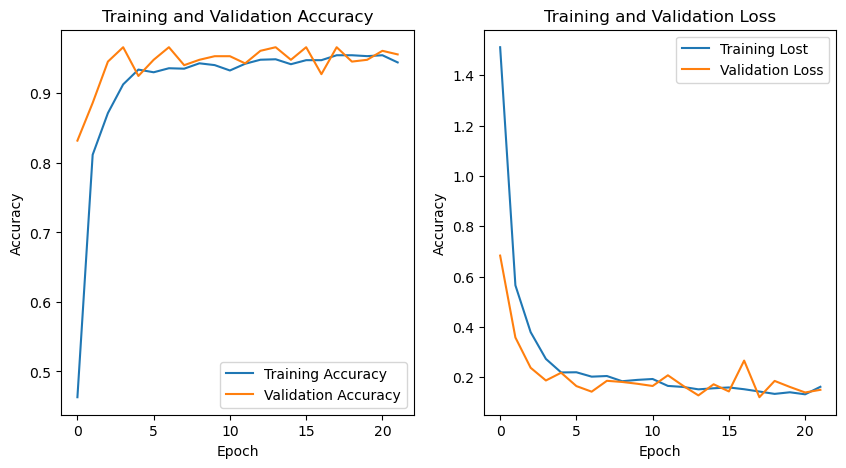

In [71]:
plt.figure(figsize= (10,5))
#Accuracy 
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
#Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'],label='Training Lost')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()          

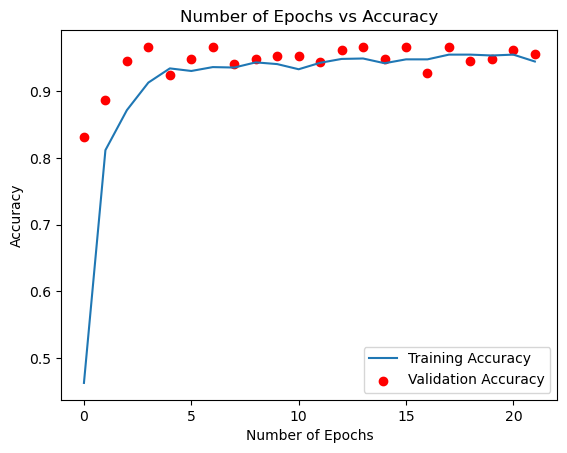

In [73]:
# Get the accuracy and validation accuracy from the history object
acc = history.history['accuracy']  # Training accuracy
acc_val = history.history['val_accuracy']  # Validation accuracy

# Adjust the number of epochs to match the length of the accuracy array
epochs_ = range(len(acc))  # Automatically set the range to the length of acc

# Plot training accuracy as a line
plt.plot(epochs_, acc, label='Training Accuracy')

# Plot validation accuracy as dots
plt.scatter(epochs_, acc_val, label='Validation Accuracy', color='red')

# Labeling the plot
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Number of Epochs vs Accuracy')

# Display the legend
plt.legend()

# Show the plot
plt.show()


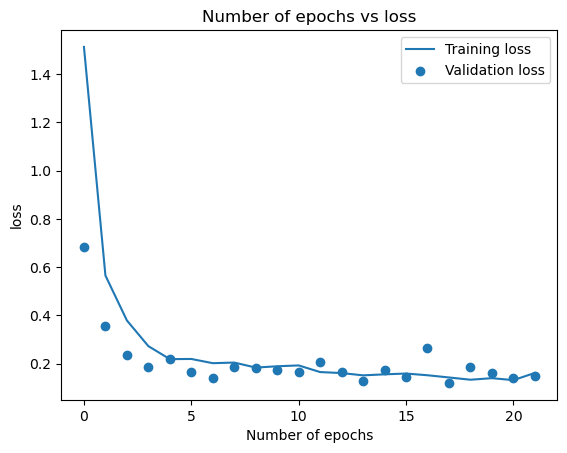

In [75]:
acc = history.history['loss']
epochs = range(25)
plt.plot(epochs_, acc, label="Training loss")
plt.xlabel('Number of epochs')
plt.ylabel('loss')

acc_val = history.history['val_loss']
plt.scatter(epochs_, acc_val, label ="Validation loss")
plt.title("Number of epochs vs loss")
plt.legend()
plt.show()

In [77]:
#EVALUATION 

In [79]:
#evaluate the cnn model 
test_loss, test_acc = model.evaluate(test_ds)
print(f'Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}')

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step - accuracy: 0.9558 - loss: 0.1418
Test loss: 0.1502, Test accuracy: 0.9561


In [81]:
#CONFUSION MATRIX 

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 126ms/step


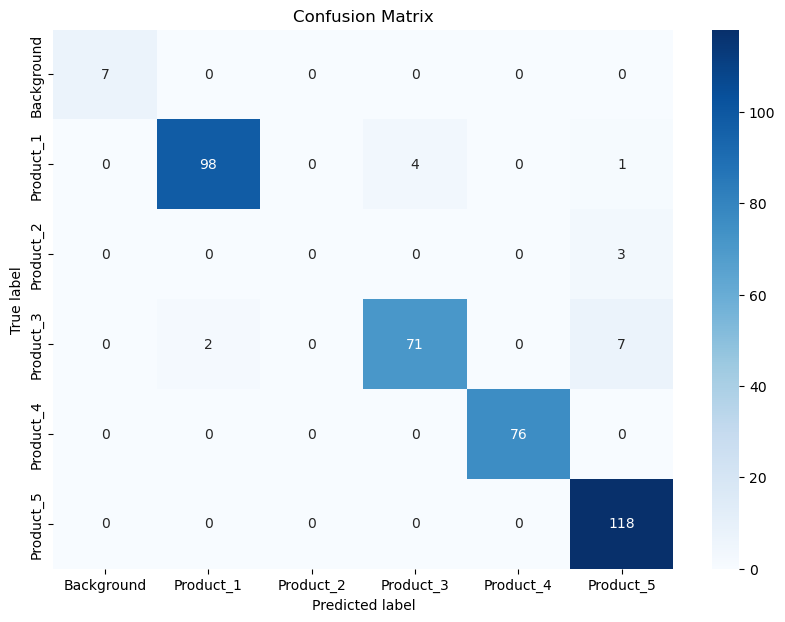

In [83]:
from sklearn.metrics import confusion_matrix 
import seaborn as sns 
import matplotlib.pyplot as plt

predictions = model.predict(test_ds)
predicted_classes = np.argmax(predictions, axis=1)

true_labels = []
for _,labels in test_ds:
    true_labels.extend(labels.numpy())

conf_matrix = confusion_matrix(true_labels, predicted_classes)

plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=folders, yticklabels= folders)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

In [85]:
#CLASSIFICATION REPORT

In [87]:
import numpy as np 
from sklearn.metrics import classification_report 

predictions = model.predict(test_ds)
predicted_labels = np.argmax(predictions, axis=1)

true_labels = tf.concat([y for x, y in test_ds], axis=0)

class_report = classification_report(true_labels, predicted_labels, target_names=folders, zero_division=1)

print(class_report)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step
              precision    recall  f1-score   support

  Background       1.00      1.00      1.00         7
   Product_1       0.98      0.95      0.97       103
   Product_2       1.00      0.00      0.00         3
   Product_3       0.95      0.89      0.92        80
   Product_4       1.00      1.00      1.00        76
   Product_5       0.91      1.00      0.96       118

    accuracy                           0.96       387
   macro avg       0.97      0.81      0.81       387
weighted avg       0.96      0.96      0.95       387



2024-12-12 14:43:22.674643: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [89]:
#OBSERVATION 

In [ ]:
#TRANSFER LEARNING 

In [91]:
#WITHOUT FINE TUNING

In [94]:
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Dense, Flatten, Dropout 
from keras.optimizers import Adam 

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
base_model.trainable = False 

for layer in base_model.layers:
    layer.trainable = False 

x = Flatten()(base_model.output)
y = Dense(224, activation = 'relu')(x)

predictions = Dense(6, activation = 'softmax')(x)


In [96]:
model_vgg16 = tf.keras.Sequential()
model_vgg16.add(data_augmentation)

model_vgg16.add(base_model)

model_vgg16.add(Flatten())
model_vgg16.add(Dense(256, activation='relu'))
model_vgg16.add(Dropout(0.2))

model_vgg16.add(Dense(6, activation='softmax'))

In [98]:
model_vgg16 = Model(inputs = base_model.input, outputs=predictions)

In [100]:
model_vgg16.compile(optimizer='adam',
                    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                    metrics=['accuracy'])

In [102]:
model_vgg16.summary()

Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 6)              │       196,614 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,911,302 (56.88 MB)

 Trainable params: 196,614 (768.02 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [61]:
epochs=10
history_vgg16 = model_vgg16.fit(
    train_ds,
    validation_data = test_ds,
    epochs=epochs
)

Epoch 1/10


/opt/anaconda3/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:678: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


49/49 ━━━━━━━━━━━━━━━━━━━━ 406s 8s/step - accuracy: 0.6976 - loss: 14.4065 - val_accuracy: 0.9561 - val_loss: 3.1678
Epoch 2/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 390s 8s/step - accuracy: 0.9494 - loss: 2.5958 - val_accuracy: 0.9690 - val_loss: 2.5301
Epoch 3/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 419s 9s/step - accuracy: 0.9892 - loss: 0.5972 - val_accuracy: 0.9793 - val_loss: 1.2694
Epoch 4/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 380s 8s/step - accuracy: 0.9902 - loss: 0.5472 - val_accuracy: 0.9716 - val_loss: 1.2297
Epoch 5/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 400s 8s/step - accuracy: 0.9935 - loss: 0.1658 - val_accuracy: 0.9845 - val_loss: 0.8632
Epoch 6/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 382s 8s/step - accuracy: 0.9930 - loss: 0.5391 - val_accuracy: 0.9793 - val_loss: 0.7987
Epoch 7/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 381s 8s/step - accuracy: 0.9922 - loss: 0.6750 - val_accuracy: 0.9845 - val_loss: 0.7062
Epoch 8/10
49/49 ━━━━━━━━━━━━━━━━━━━━ 384s 8s/step - accuracy: 0.9883 - loss: 0.3048 - val_accuracy: 0.9716 - val_loss: 2

In [66]:
test_loss, test_acc = model_vgg16.evaluate(test_ds)
print(f'Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}')

13/13 ━━━━━━━━━━━━━━━━━━━━ 75s 6s/step - accuracy: 0.9559 - loss: 2.4215
Test loss: 1.7640, Test accuracy: 0.9690


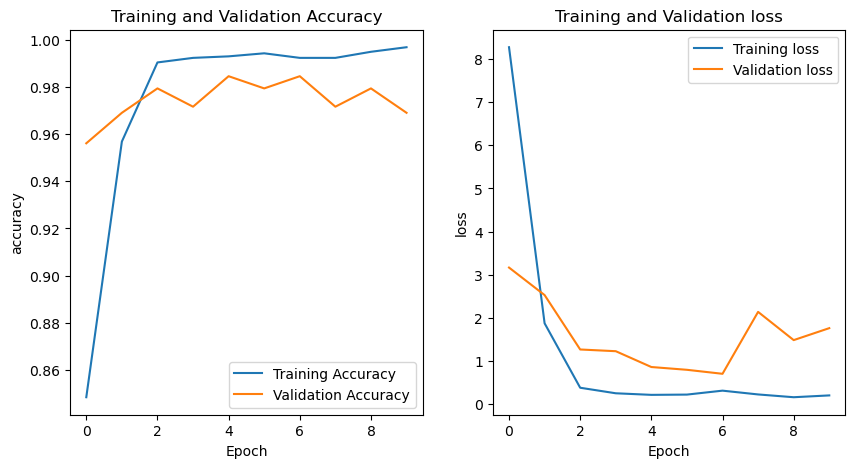

In [77]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(history_vgg16.history['accuracy'], label ='Training Accuracy')
plt.plot(history_vgg16.history['val_accuracy'], label ='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel('Epoch')
plt.ylabel('accuracy')
plt.legend()


plt.subplot(1,2,2)
plt.plot(history_vgg16.history['loss'], label ='Training loss')
plt.plot(history_vgg16.history['val_loss'], label ='Validation loss')
plt.title("Training and Validation loss")
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend()

plt.show()

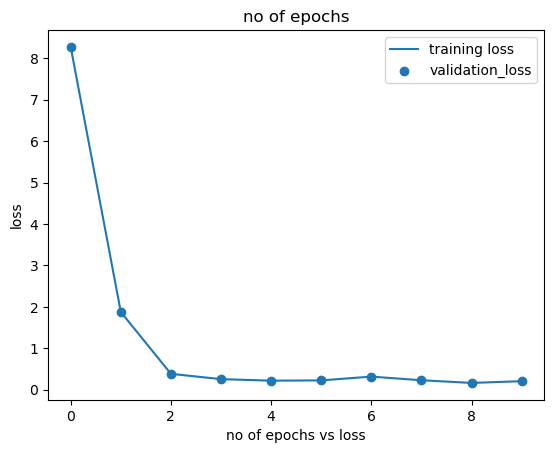

In [82]:
loss = history_vgg16.history['loss']
epochs_=range(0,epochs)
plt.plot(epochs_, loss, label='training loss')
plt.xlabel('no of epochs vs loss')
plt.ylabel('no of epochs')
plt.ylabel('loss')

loss_val = history_vgg16.history['loss']
plt.scatter(epochs_, loss_val, label="validation_loss")
plt.title('no of epochs')
plt.legend()

13/13 ━━━━━━━━━━━━━━━━━━━━ 78s 6s/step


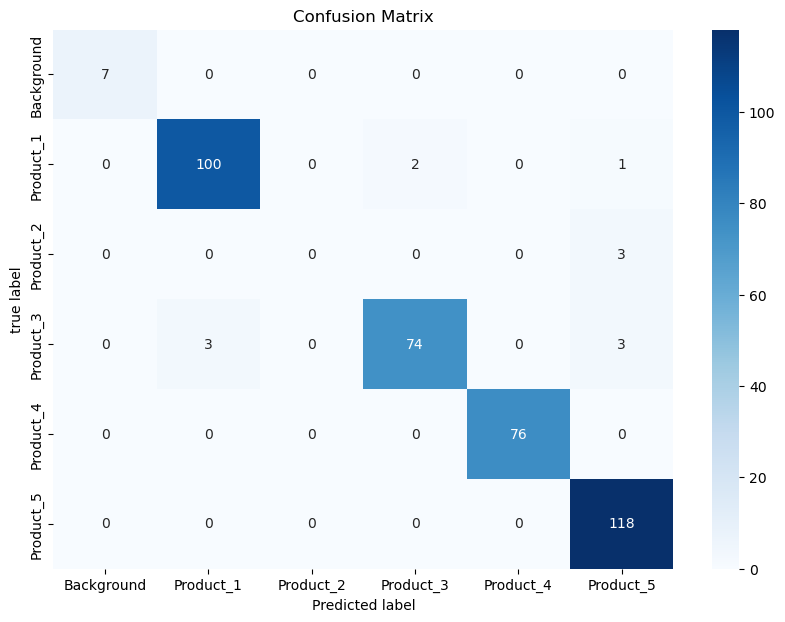

In [98]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

predictions = model_vgg16.predict(test_ds)
predicted_classes = np.argmax(predictions, axis=1)

true_labels =[]
for _, labels in test_ds:
    true_labels.extend(labels.numpy())

conf_matrix = confusion_matrix(true_labels, predicted_classes)

plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',xticklabels=folders, yticklabels=folders)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('true label')
plt.show()


In [104]:
import numpy as np 
from sklearn.metrics import classification_report

predictions = model_vgg16.predict(test_ds)
predictions_labels = np.argmax(predictions, axis=1)

true_labels = tf.concat([y for x, y in test_ds], axis=0)
class_report = classification_report(true_labels, predicted_labels, target_names=folders, zero_division=1)

print(class_report)

13/13 ━━━━━━━━━━━━━━━━━━━━ 76s 6s/step
              precision    recall  f1-score   support

  Background       1.00      1.00      1.00         7
   Product_1       1.00      0.86      0.93       103
   Product_2       1.00      0.00      0.00         3
   Product_3       0.85      0.95      0.90        80
   Product_4       1.00      1.00      1.00        76
   Product_5       0.94      1.00      0.97       118

    accuracy                           0.95       387
   macro avg       0.97      0.80      0.80       387
weighted avg       0.95      0.95      0.94       387



In [ ]:
#WITH FINE TUNING 

In [104]:
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Dense, Flatten

fine_model = VGG16(weights='imagenet', include_top=False, input_shape=(256,256,3))
fine_model.trainable = True 

x = Flatten()(fine_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(6, activation ='softmax')(x)

model_fined_tuned = Model(inputs=fine_model.input, outputs=predictions)


In [106]:
model_fined_tuned.compile(optimizer='adam',
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                         metrics=['accuracy'])

In [108]:
model_fined_tuned.summary()

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 6)              │         1,542 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,105,094 (88.14 MB)

 Trainable params: 23,105,094 (88.14 MB)

 Non-trainable params: 0 (0.00 B)

In [110]:
epochs=20

tuned_history = model_fined_tuned.fit(
    train_ds,
    validation_data=test_ds,
    epochs=epochs
)

Epoch 1/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1215s 25s/step - accuracy: 0.2325 - loss: 10.5287 - val_accuracy: 0.4109 - val_loss: 1.4525
Epoch 2/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1272s 26s/step - accuracy: 0.2934 - loss: 1.5138 - val_accuracy: 0.3049 - val_loss: 1.4733
Epoch 3/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1213s 25s/step - accuracy: 0.2861 - loss: 1.5082 - val_accuracy: 0.3049 - val_loss: 1.4548
Epoch 4/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1104s 23s/step - accuracy: 0.2894 - loss: 1.4954 - val_accuracy: 0.3049 - val_loss: 1.4439
Epoch 5/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1441s 30s/step - accuracy: 0.2983 - loss: 1.4833 - val_accuracy: 0.3049 - val_loss: 1.4345
Epoch 6/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1350s 28s/step - accuracy: 0.3122 - loss: 1.4753 - val_accuracy: 0.4703 - val_loss: 1.4300
Epoch 7/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1606s 33s/step - accuracy: 0.3128 - loss: 1.4718 - val_accuracy: 0.2687 - val_loss: 1.4212
Epoch 8/20
49/49 ━━━━━━━━━━━━━━━━━━━━ 1260s 26s/step - accuracy: 0.3319 - loss: 1.4408 - val_acc

Text(0.5, 1.0, 'Training and validation Loss')

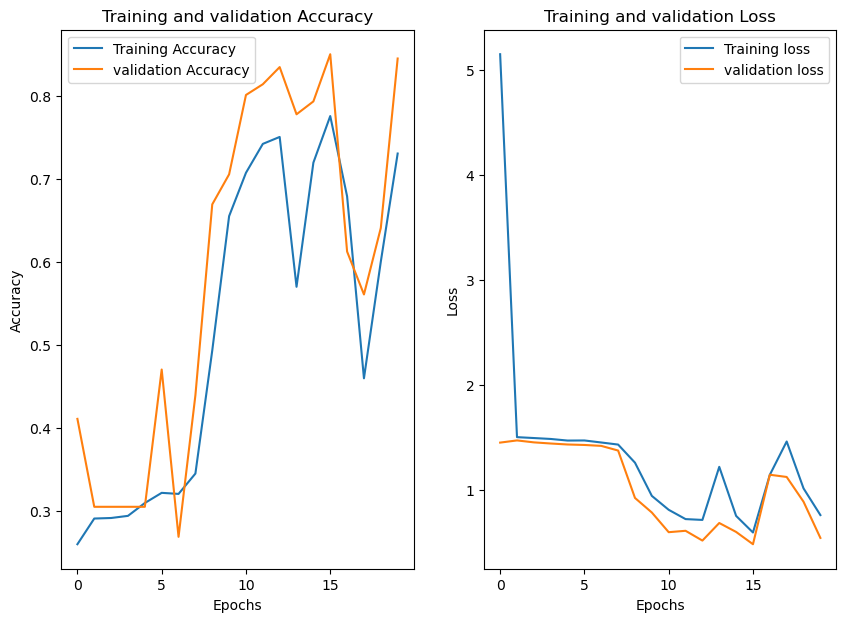

In [114]:
#plot training and validation loss and accuarcy 
plt.figure(figsize=(10,7))

plt.subplot(1,2,1)
plt.plot(tuned_history.history['accuracy'], label='Training Accuracy')
plt.plot(tuned_history.history['val_accuracy'], label='validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and validation Accuracy')

plt.subplot(1,2,2)
plt.plot(tuned_history.history['loss'], label='Training loss')
plt.plot(tuned_history.history['val_loss'], label='validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and validation Loss')

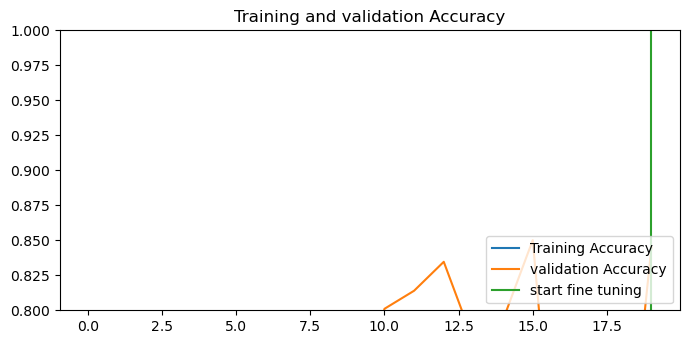

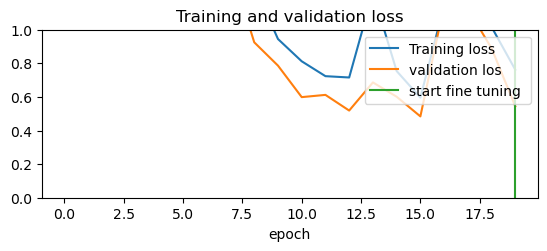

In [130]:
plt.figure(figsize=(8,8))
plt.subplot(2,1,1)
plt.plot(tuned_history.history['accuracy'], label='Training Accuracy')
plt.plot(tuned_history.history['val_accuracy'], label='validation Accuracy')
plt.ylim([0.8, 1])
plt.plot([epochs-1, epochs-1],
        plt.ylim(),label='start fine tuning ')
plt.legend(loc='lower right')
plt.title('Training and validation Accuracy')
plt.show()

plt.subplot(2,1,1)
plt.plot(tuned_history.history['loss'], label='Training loss')
plt.plot(tuned_history.history['val_loss'], label='validation los')
plt.ylim([0,1.0])
plt.plot([epochs-1, epochs-1],
        plt.ylim(),label='start fine tuning ')
plt.legend(loc='upper right')
plt.title('Training and validation loss')
plt.xlabel('epoch')
plt.show()

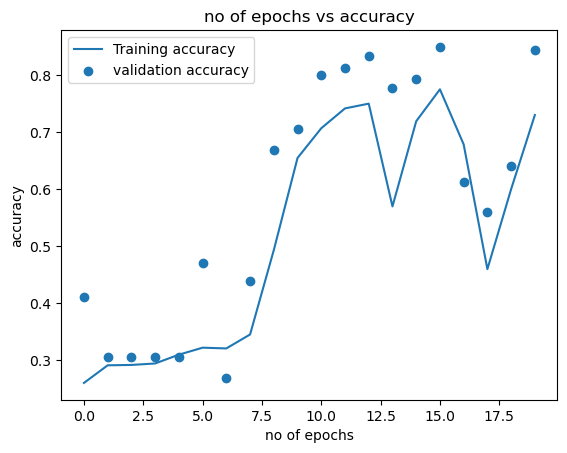

In [132]:
acc = tuned_history.history['accuracy']
epochs_= range(0,epochs)
plt.plot(epochs_,acc,label='Training accuracy')
plt.xlabel('no of epochs')
plt.ylabel('accuracy')

acc_val=tuned_history.history['val_accuracy']
plt.scatter(epochs_,acc_val,label='validation accuracy')
plt.title('no of epochs vs accuracy')
plt.legend()


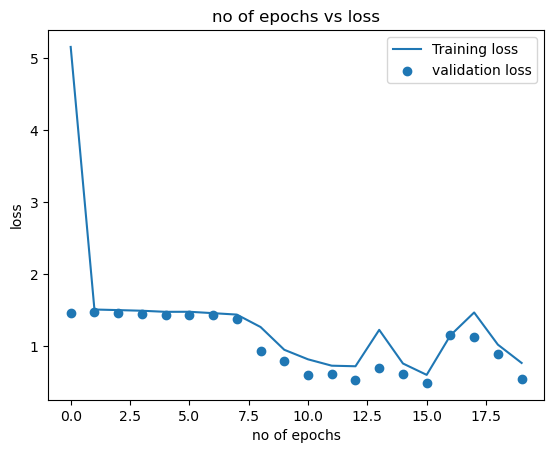

In [134]:
acc = tuned_history.history['loss']
epochs_= range(0,epochs)
plt.plot(epochs_,acc,label='Training loss')
plt.xlabel('no of epochs')
plt.ylabel('loss')

acc_val=tuned_history.history['val_loss']
plt.scatter(epochs_,acc_val,label='validation loss')
plt.title('no of epochs vs loss')
plt.legend()

In [ ]:
#Evaluation on Model

In [142]:
loss,accuracy = model_fined_tuned.evaluate(test_ds)
print('Test accuracy:',accuracy)

13/13 ━━━━━━━━━━━━━━━━━━━━ 36s 3s/step - accuracy: 0.8480 - loss: 0.5294
Test accuracy: 0.8449612259864807


In [ ]:
#Plotting Confusion Matrix

13/13 ━━━━━━━━━━━━━━━━━━━━ 37s 3s/step


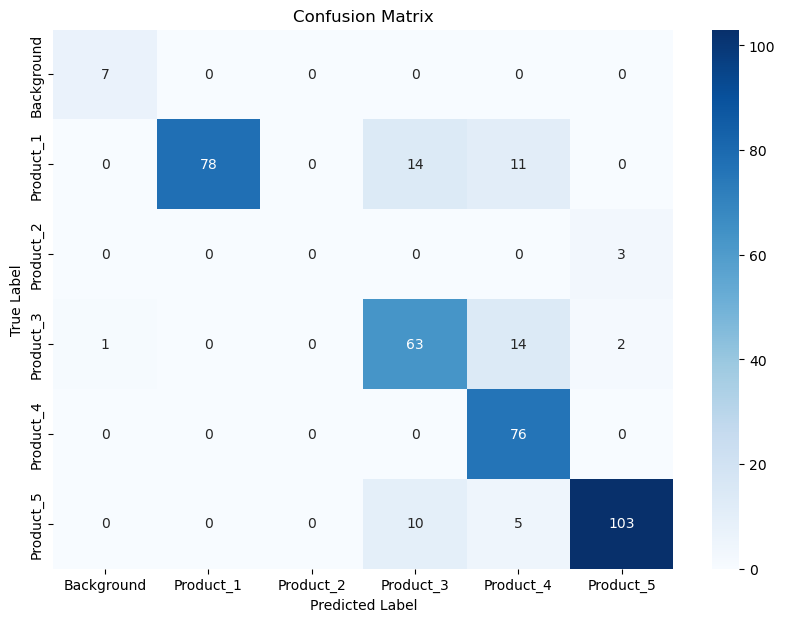

In [157]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

predictions=model_fined_tuned.predict(test_ds)
predicted_classes=np.argmax(predictions,axis=1)

true_labels=[]
for _, labels in test_ds:
   true_labels.extend(labels.numpy())

conf_matrix=confusion_matrix(true_labels,predicted_classes)

plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',xticklabels=folders,yticklabels=folders)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()            


In [ ]:
#Classification Report

In [163]:
import numpy as np
from sklearn.metrics import classification_report

predictions=model_fined_tuned.predict(test_ds)
predicted_classes=np.argmax(predictions,axis=1)
true_labels=tf.concat([y for x, y in test_ds],axis=0)
class_report=classification_report(true_labels,predicted_labels,target_names=folders,zero_division=1)

print(class_report)

13/13 ━━━━━━━━━━━━━━━━━━━━ 39s 3s/step
              precision    recall  f1-score   support

  Background       1.00      1.00      1.00         7
   Product_1       0.98      0.95      0.97       103
   Product_2       1.00      0.00      0.00         3
   Product_3       0.95      0.89      0.92        80
   Product_4       1.00      1.00      1.00        76
   Product_5       0.91      1.00      0.96       118

    accuracy                           0.96       387
   macro avg       0.97      0.81      0.81       387
weighted avg       0.96      0.96      0.95       387



2024-12-12 22:51:39.704624: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


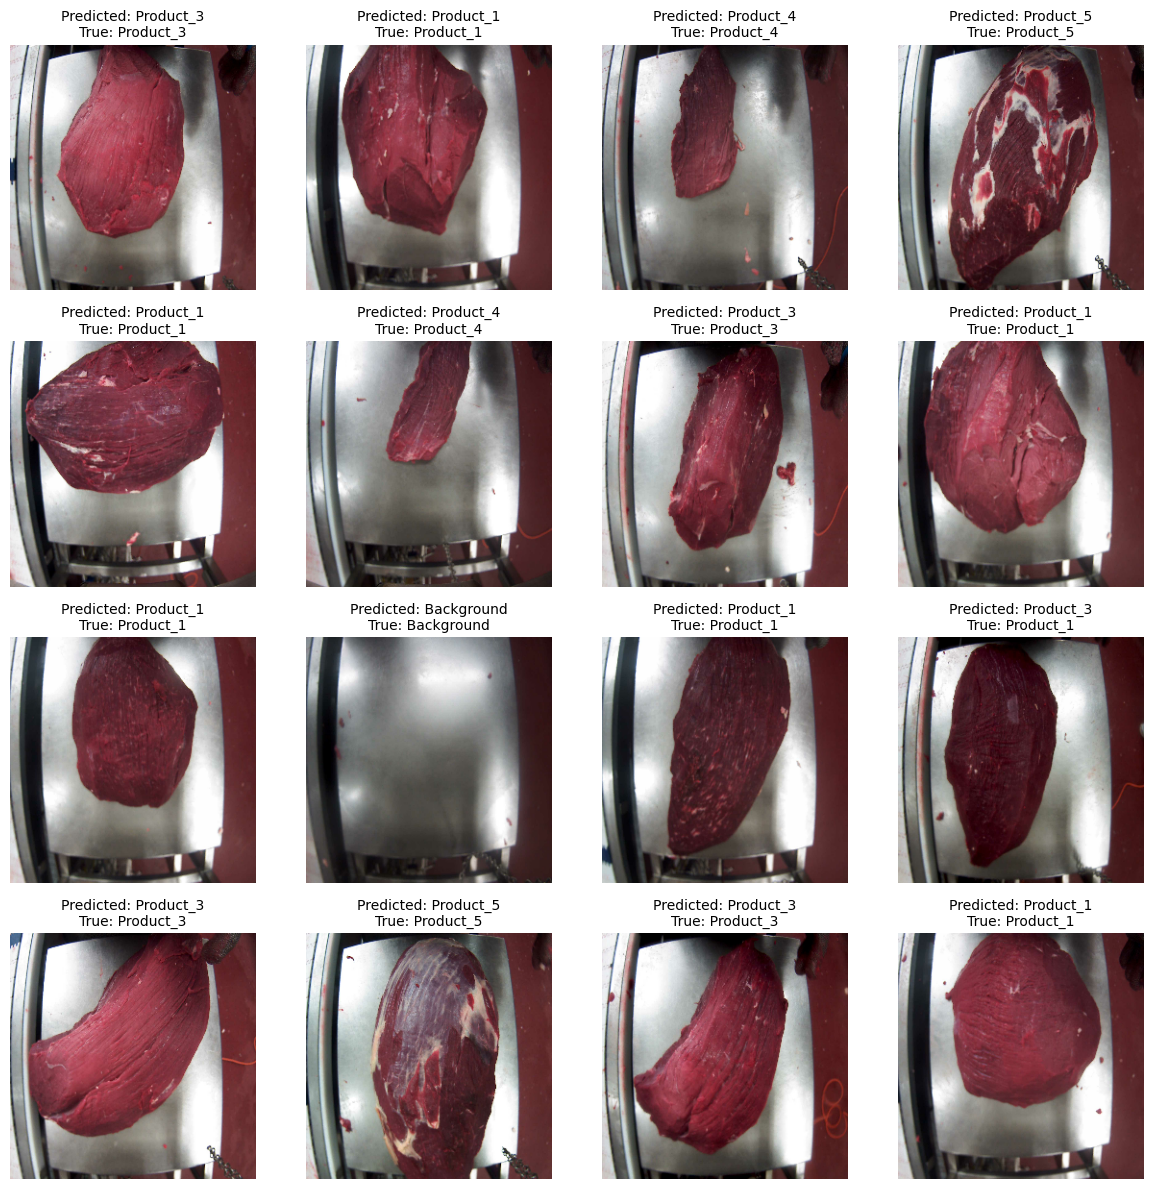

In [171]:
folders = ['Background', 'Product_1', 'Product_2', 'Product_3', 'Product_4', 'Product_5']

image_batch, label_batch = test_ds.as_numpy_iterator().next()

num_rows=4
num_cols=4

predictions = model_fined_tuned.predict_on_batch(image_batch)

total_images = num_rows*num_cols

plt.figure(figsize=(12,12))

for i in range(num_rows * num_cols):
    original_image = image_batch[i].astype("uint8")
    predicted_label_index = np.argmax(predictions[i])

    plt.subplot(num_rows, num_cols, i+1)
    plt.imshow(original_image)
    plt.title(f"Predicted: {folders[predicted_label_index]}\nTrue: {folders[label_batch[i]]}", fontsize=10)
    plt.axis("off")

plt.tight_layout()
plt.show()

predicitons:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1]
Labels:
 [3 1 4 5 1 4 3 1 1 0 1 1 3 5 3 1 1 5 3 5 5 3 1 2 3 5 1 4 5 1 3 5]


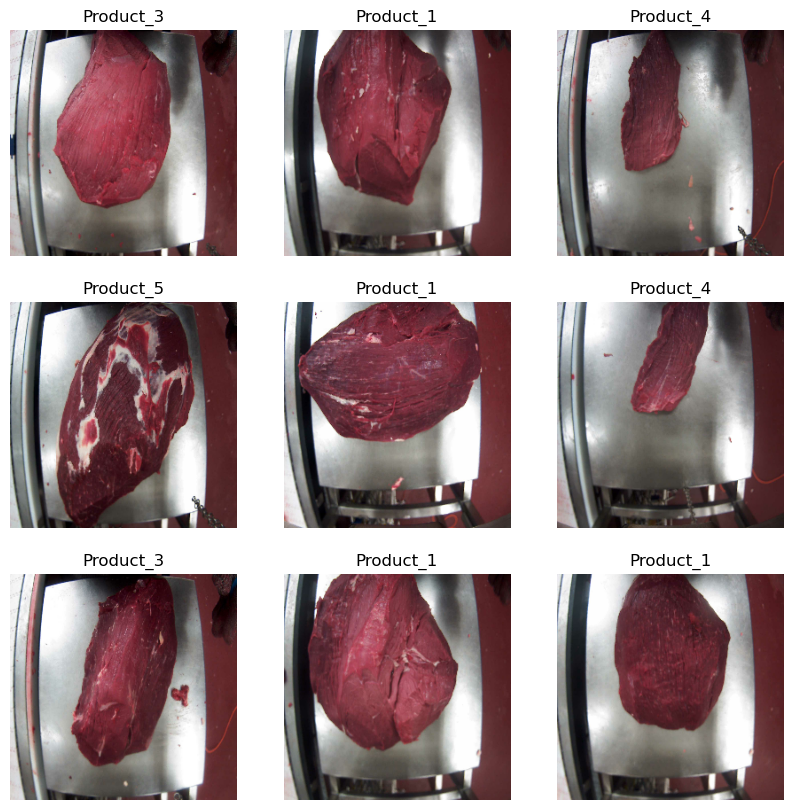

In [193]:
classname = labels
image_batch, label_batch = test_ds.as_numpy_iterator().next()
predictions = model_fined_tuned.predict_on_batch(image_batch).flatten()

predictions = tf.nn.sigmoid(predictions)
predictions = tf.where(predictions <0.5, 0, 1)

print('predicitons:\n', predictions.numpy())
print('Labels:\n', label_batch)

plt.figure(figsize=(10,10))
for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(image_batch[i].astype("uint8"))
    plt.title(class_names[label_batch[i]])
    plt.axis("off")